# Linear regression fitting noise versus structure

Let 
$$
y = y^\ast + e, \quad y^\ast = X \theta^\ast
$$
where $X$ is a fat matrix. Consider optimizing the least squares objective 
$$
\frac{1}{2}
\| X \theta - y \|^2.
$$
The gradient is 
$$
\nabla f(\theta) = X^T X \theta - X^T y.
$$
We have
$$
\begin{align}
\theta_{k+1} - \theta^\ast
&=
\theta_k - \alpha(X^T X \theta - X^T y) - \theta^\ast \\
&=
\theta_k - \alpha(X^T X \theta - X^T X \theta^\ast - X^T e) - \theta^\ast \\
&=
(I - \alpha X^T X) (\theta_k - \theta^\ast) + \alpha X^T e
\end{align}
$$
The difference in terms of residual therefore becomes
$$
X\theta_{k+1} - X\theta^\ast
=
(I - \alpha XX^T) (X\theta_k - X\theta^\ast) + \alpha X X^T e \\
$$

In [1]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pyplot as plt
from numpy import *
import numpy as np

In [2]:
def gradient_descent(A,b,niter = 10000,ytarget=None,stepsize=None):
    
    def f(x):
        return linalg.norm(dot(A,x) - b)**2

    def gradf(x):
        return 0.5*(dot(Q,x) - dot(b,A))

    Q = dot(A.T,A)
    eigenvalues = linalg.eigvals(Q)
    M = max(eigenvalues)
    m = min(eigenvalues)

    xopt = dot( linalg.inv( dot(A.T,A) ), dot( A.T , b ) ) 
    
    print("optimal errors: ", linalg.norm( y -  dot(A,xopt) ), linalg.norm( ytarget - dot(A,xopt) ) )
    
    if stepsize==None:
        stepsize = 2/(M+m)
    
    print("minimal and maximal eigenvalues: ", m, M)
    print("stepsize: ", stepsize)
     
    residuals = []
    gradients = []
    residual_target = []
    distances = []
    xk = zeros(n) #random.randn(n) # random initializer
    for k in range(niter):
        xk = xk - stepsize*gradf(xk)
        residuals.append( linalg.norm( y -  dot(A,xk) ) )
        gradients.append( linalg.norm(gradf(xk)) )
        residual_target.append( linalg.norm( ytarget - dot(A,xk) ) )
        distances.append( linalg.norm(xk) )
    return array(residuals), array(gradients), array(residual_target),array(distances)

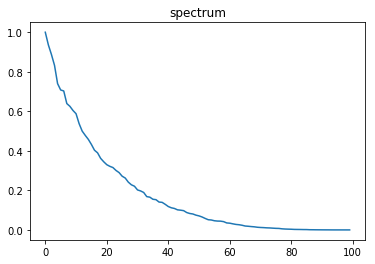

1.5072614647736406 1.0000000000000009 1.0 0.13591856159578958
optimal errors:  0.5198674927030573 1.052776280346125
minimal and maximal eigenvalues:  3.3195518835241045e-18 1.0000000000000047
stepsize:  0.25
logarithmic


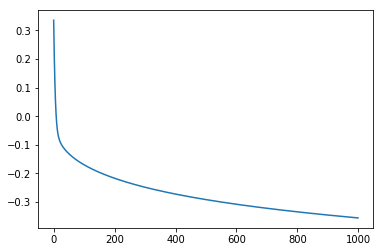

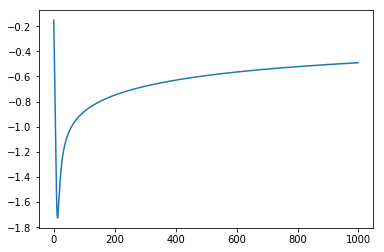

non logarithmic


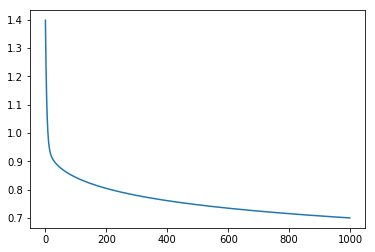

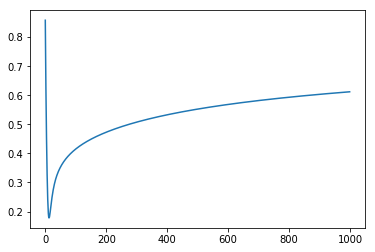

In [3]:
# generate a problem instance
n = 100
A = random.randn(n,n)
U,S,VT = linalg.svd(A)

ytarget = U[:, int(0)]
perturbation = random.randn(n) #U[:,n-10]
perturbation = perturbation/linalg.norm(perturbation)
#perturbation = U[:,n-10]

newS = np.array([s**3 for s in S])
newS = newS/np.max(newS)
plt.plot(newS)
plt.title("spectrum")
plt.show()

S = np.diag(newS)
A = U @ S @ VT

y = ytarget + perturbation

print(linalg.norm(y), linalg.norm(ytarget), linalg.norm(perturbation), dot(ytarget,perturbation)  )

steps = 1000
residuals,gradients,residual_target,distances = gradient_descent(A,y,niter=steps,ytarget=ytarget,stepsize=0.25)

print("logarithmic")
plt.plot( log(residuals) )
plt.show()
plt.plot( log(residual_target) )
plt.show()

print("non logarithmic")
plt.plot( residuals )
plt.show()
plt.plot( residual_target )
plt.show()


ks = np.array( [i for i in range(steps)] )
np.savetxt("ls_residuals.dat", np.vstack([ ks ,np.array(residuals),np.array(residual_target) ] ).T , delimiter="\t")

ns = np.array( [i for i in range(n)] )
np.savetxt("ls_spectrum.dat", np.vstack([ ns ,np.array(newS)] ).T , delimiter="\t")
